In [94]:
# Test codes for data analysis of the hospital price transparency dataset

# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline #valid only for Jupyter notebooks
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

# read dataset
hospital_prices_file_path = "C:/Users/vladc/OneDrive/Documents/Project Legacy/hospital_prices.csv"

hospital_prices = pd.read_csv(hospital_prices_file_path, low_memory=False, nrows=100000)

In [95]:
hospital_prices.describe()

,cms_certification_num,units,price
count,100000.0,0.0,100000.000000
mean,10001.0,NaN,7870.533904
std,0.0,NaN,25357.245586
min,10001.0,NaN,0.000000
25%,10001.0,NaN,142.160000
50%,10001.0,NaN,701.250000
75%,10001.0,NaN,3657.500000
max,10001.0,NaN,540518.510000


In [96]:
hospital_prices.head()

,cms_certification_num,payer,code,internal_revenue_code,units,description,inpatient_outpatient,price,code_disambiguator
0,10001,AMERIGROUP MEDICAID [350002],100,MS100,NaN,SEIZURES WITH MCC,UNSPECIFIED,26744.41,NONE
1,10001,BLUE ADVANTAGE [308003],100,MS100,NaN,SEIZURES WITH MCC,UNSPECIFIED,26744.41,NONE
2,10001,BLUE CROSS OF ALA [200001],100,MS100,NaN,SEIZURES WITH MCC,UNSPECIFIED,26744.41,NONE
3,10001,CARESOURCE [100121],100,MS100,NaN,SEIZURES WITH MCC,UNSPECIFIED,26744.41,NONE
4,10001,CONNECTICUT GENERAL [100009],100,MS100,NaN,SEIZURES WITH MCC,UNSPECIFIED,26744.41,NONE


In [97]:
hospital_prices.columns

Index(['cms_certification_num', 'payer', 'code', 'internal_revenue_code',
       'units', 'description', 'inpatient_outpatient', 'price',
       'code_disambiguator'],
      dtype='object')

In [98]:
hospital_prices['payer'].value_counts()

VIVA HEALTH INC [308017]          6005
CONNECTICUT GENERAL [100009]      6005
AMERIGROUP MEDICAID [350002]      5866
MEDICARE AETNA [450001]           5866
WELLCARE GA MEDICAID [308019]     5866
UNITED HEALTHCARE [100060]        5866
PEACH STATE HLTH PLAN [308012]    5866
NAPHCARE [308024]                 5866
MEDICARE VIVAHEALTH [308009]      5866
HUMANA [100052]                   5866
BLUE ADVANTAGE [308003]           5866
HUMANA GOLD CHOICE [450013]       5866
GEHA [100039]                     5866
FIRST HEALTH [308007]             5866
CARESOURCE [100121]               5866
BLUE CROSS OF ALA [200001]        5866
WELLCARE MEDICARE [450023]        5866
Name: payer, dtype: int64

In [99]:
drop_payers = {'CASH CHARGE', 'MAX', 'MIN', 'GROSS CHARGE', 'CASH PRICE'}
payers = set()
for payer in hospital_prices['payer']:
    payers.add(payer)
    if "OTHER" in payer:
               drop_payers.add(payer)
print(drop_payers)

{'CASH CHARGE', 'GROSS CHARGE', 'MAX', 'MIN', 'CASH PRICE'}


In [100]:
print(payers)

{'CONNECTICUT GENERAL [100009]', 'BLUE ADVANTAGE [308003]', 'WELLCARE MEDICARE [450023]', 'UNITED HEALTHCARE [100060]', 'BLUE CROSS OF ALA [200001]', 'AMERIGROUP MEDICAID [350002]', 'MEDICARE AETNA [450001]', 'GEHA [100039]', 'WELLCARE GA MEDICAID [308019]', 'FIRST HEALTH [308007]', 'HUMANA GOLD CHOICE [450013]', 'HUMANA [100052]', 'CARESOURCE [100121]', 'NAPHCARE [308024]', 'MEDICARE VIVAHEALTH [308009]', 'PEACH STATE HLTH PLAN [308012]', 'VIVA HEALTH INC [308017]'}


In [101]:
hospital_prices = hospital_prices[(hospital_prices['payer'] != 'GROSS CHARGE') & (hospital_prices['payer'] != 'MAX') & (hospital_prices['payer'] != 'MIN') & (hospital_prices['payer'] != 'CASH CHARGE') & (hospital_prices['payer'] != 'CASH PRICE')]

In [102]:
hospital_prices['payer'].value_counts()

VIVA HEALTH INC [308017]          6005
CONNECTICUT GENERAL [100009]      6005
AMERIGROUP MEDICAID [350002]      5866
MEDICARE AETNA [450001]           5866
WELLCARE GA MEDICAID [308019]     5866
UNITED HEALTHCARE [100060]        5866
PEACH STATE HLTH PLAN [308012]    5866
NAPHCARE [308024]                 5866
MEDICARE VIVAHEALTH [308009]      5866
HUMANA [100052]                   5866
BLUE ADVANTAGE [308003]           5866
HUMANA GOLD CHOICE [450013]       5866
GEHA [100039]                     5866
FIRST HEALTH [308007]             5866
CARESOURCE [100121]               5866
BLUE CROSS OF ALA [200001]        5866
WELLCARE MEDICARE [450023]        5866
Name: payer, dtype: int64

In [103]:
drop_payers = {'CASH CHARGE', 'MAX', 'MIN', 'GROSS CHARGE'}
payers = set()
for payer in hospital_prices['payer']:
    payers.add(payer)
    if "OTHER" in payer:
               drop_payers.add(payer)
print(drop_payers)

{'CASH CHARGE', 'MAX', 'MIN', 'GROSS CHARGE'}


In [104]:
print(payers)

{'CONNECTICUT GENERAL [100009]', 'BLUE ADVANTAGE [308003]', 'WELLCARE MEDICARE [450023]', 'UNITED HEALTHCARE [100060]', 'BLUE CROSS OF ALA [200001]', 'AMERIGROUP MEDICAID [350002]', 'MEDICARE AETNA [450001]', 'GEHA [100039]', 'WELLCARE GA MEDICAID [308019]', 'FIRST HEALTH [308007]', 'HUMANA GOLD CHOICE [450013]', 'HUMANA [100052]', 'CARESOURCE [100121]', 'NAPHCARE [308024]', 'MEDICARE VIVAHEALTH [308009]', 'PEACH STATE HLTH PLAN [308012]', 'VIVA HEALTH INC [308017]'}


In [105]:
hospital_prices['cms_certification_num'].value_counts()

10001    100000
Name: cms_certification_num, dtype: int64

In [106]:
hospital_prices.describe()

,cms_certification_num,units,price
count,100000.0,0.0,100000.000000
mean,10001.0,NaN,7870.533904
std,0.0,NaN,25357.245586
min,10001.0,NaN,0.000000
25%,10001.0,NaN,142.160000
50%,10001.0,NaN,701.250000
75%,10001.0,NaN,3657.500000
max,10001.0,NaN,540518.510000


<AxesSubplot:>

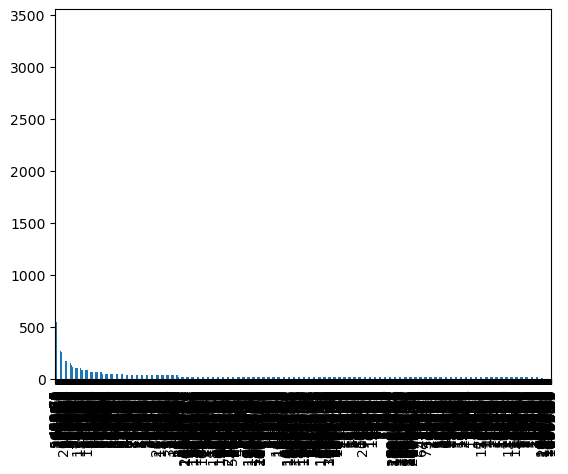

In [107]:
hospital_prices['price'].value_counts().plot.bar()

In [108]:
print("Mean Price: {}".format(hospital_prices['price'].mean()))

Mean Price: 7870.533903700288


In [109]:
print("Median Price: {}".format(hospital_prices['price'].median()))

Median Price: 701.25


In [91]:
print("Mode Price: {}".format(hospital_prices['price'].mode()))

Mode Price: 0    2475.0
Name: price, dtype: float64


In [92]:
print("Number of Payers: {}".format(len(payers)))

Number of Payers: 191


<AxesSubplot:>

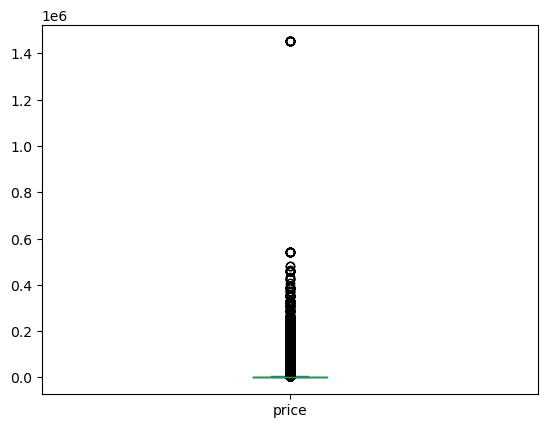

In [93]:
hospital_prices['price'].plot.box()

C:\Users\vladc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

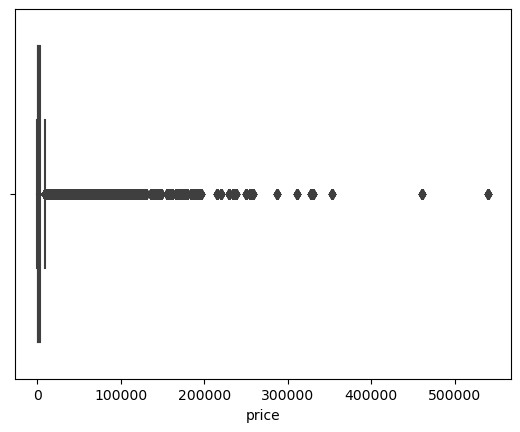

In [110]:
sns.boxplot(hospital_prices['price'])